# Simple reading of a .csv file

Demonstrating the reading .csv files into a list of namedtuples.   Does not need the csv module.
Includes a self contained unit test.

In [9]:
from collections import namedtuple

# The 'namedtuple' class allows on-the-fly creation of a light weight class much like a traditional
# record.  Fields can be accessed either as class properties - e.g. person.age
# or by index - person[2]

In [10]:
def create_example_csv_file(fname):
    """ Write a trivial example .csv file, to keep this script self contained"""
    contents =\
        """first_name,second_name,age,height,gender
Fred,Bloggs,59,1.95,male
Peter,Bloggs,15,1.86,male
Ann,Somebody,32,1.76,female
Ada,Lovelace,46,1.67,female
"""
    with open(fname, 'w') as f:
        f.write(contents)

In [11]:
def read_csv(fname):
    """
    Read from the given .csv file into a list of named tuples, the class being named "Row".
    The tuple fields are taken from the file's header line.  Note we avoid dependency on the
    csv module - just standard readlines() is sufficient.
    Note we have to strip out any '"' marks, using replace
    """

    # The 'with' statement ensures the file is closed
    with open(fname, 'r') as f:
        # Read the first line which will be the 'header' of field names
        header = f.readline().replace('"','')

        # Use the header line to define a namedtuple class, having fields from the header
        Row = namedtuple("Row", header)

        # Read all the rows into a list of Row classes
        # Each line is first stripped of the trailing '\n', then split into a list of
        # comma separated words which are then passed as parameters to the Row constructor
        # using the handy Python '*' operator.
        rows = [Row(*(line.replace('"','').rstrip('\n').split(','))) for line in f.readlines()]

    return rows

def test_read_csv():
    """
    A simple unit test for read_csv
    """
    test_filename = '/tmp/trivial_test_example.csv'
    create_example_csv_file(test_filename)
    data = read_csv(test_filename)
    assert len(data) == 4       # expecting 4 rows
    assert len(data[0]) == 5    # expecting 5 field tuples
    assert data[0].age == '59'  # check we can access fields by name
    assert data[0][2] == '59'   # ... and by index

    print("Test_read_csv passed.\n")
    
test_read_csv()

Test_read_csv passed.



In [12]:
# Demonstrate usage

print(__doc__)

# Run our unit test
test_read_csv()

# Write a trivial .csv file to work with
filename = '/tmp/trivial_test_example.csv'
create_example_csv_file(filename)

# Read it into a list of namedtuples using our function
table = read_csv(filename)

# Show what we've got
for row in table:
    print(row)

# Explain what we have - demonstrating use of field names
print()
for row in table:
    print("%s %s is a %d years old %s and is %4.2fm tall." %
        (row.first_name, row.second_name, int(row.age), row.gender, float(row.height)))

# Demonstrate calculating some statistics on the data
mean_height = sum([float(row.height) for row in table]) / len(table)
print("\nMean height is %4.2fm" % mean_height)



Demonstrating the reading .csv files into a list of namedtuples.
Includes a self contained unit test.

Test_read_csv passed.

Row(first_name='Fred', second_name='Bloggs', age='59', height='1.95', gender='male')
Row(first_name='Peter', second_name='Bloggs', age='15', height='1.86', gender='male')
Row(first_name='Ann', second_name='Somebody', age='32', height='1.76', gender='female')
Row(first_name='Ada', second_name='Lovelace', age='46', height='1.67', gender='female')

Fred Bloggs is a 59 years old male and is 1.95m tall.
Peter Bloggs is a 15 years old male and is 1.86m tall.
Ann Somebody is a 32 years old female and is 1.76m tall.
Ada Lovelace is a 46 years old female and is 1.67m tall.

Mean height is 1.81m


# Matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

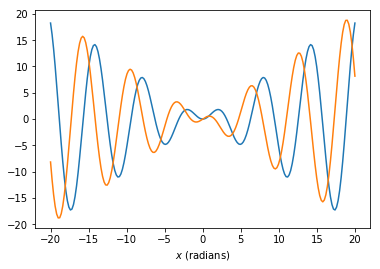

In [4]:
x = np.linspace(-20, 20, 200)
y = x * np.sin(x)
y2 = x * np.cos(x)
plt.plot(x,y,label='$x * \sin(x)$')
plt.plot(x,y2,label='$x * \cos(x)$')
plt.xlabel('$x$ (radians)')
plt.show()